# Class 14

# Part-1

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import make_classification
#from sklearn.datasets import make_regression ## for regression

In [2]:
x,y = make_classification(n_samples=60000,n_features=25) #60k samples with 25 features

In [3]:
x.shape

(60000, 25)

In [4]:
y.shape

(60000,)

In [5]:
y = pd.DataFrame(y)

In [6]:
y.head()

,0
0,0
1,1
2,1
3,1
4,1


In [7]:
y.value_counts()

1    30010
0    29990
dtype: int64

In [8]:
x = pd.DataFrame(x)

In [9]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.291149,1.034817,-1.047078,2.156125,-0.352130,-1.202354,-1.853588,-0.143623,0.803279,0.128984,...,0.897169,0.106990,-0.207067,-0.285809,0.753934,0.959433,0.982800,1.193064,0.256026,-0.667268
1,1.905479,-1.175499,0.520907,-0.670786,0.890115,0.076519,0.772870,-1.471259,1.239778,1.402459,...,-2.284689,0.271303,-0.082194,-0.600864,-0.727836,0.628411,-0.174455,-0.207725,1.828910,-0.633788
2,-0.217323,-1.161704,0.189438,0.420921,-0.518284,1.275790,0.723931,-0.244843,0.072023,0.214870,...,1.703742,-0.488470,-0.827182,-1.194397,0.303351,1.146431,0.850714,-1.104424,1.276213,1.065279
3,-0.554631,0.284032,-1.374606,0.585755,1.402866,0.166770,1.076645,1.561465,-1.005450,0.557491,...,0.574590,-0.210620,0.265748,0.004435,-0.303272,-2.465888,0.589372,0.859165,1.053871,-1.082764
4,1.726981,0.190323,0.764489,0.556704,1.951666,0.544751,1.321789,-1.205770,-0.085624,-0.117923,...,1.708054,-0.463948,0.571896,0.398442,0.597403,0.272485,-1.781709,0.797896,-0.559853,-1.610746


## Split data for train test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.25,random_state=1)

In [12]:
xtrain.shape

(45000, 25)

In [13]:
train_accuracy = []
test_accuracy= []

max_features = [n for n in range (1,25)] # 0 is avoided

In [14]:
max_features

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
for depth in max_features:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(xtrain,ytrain) #training
    
    # train accuracy
    train_acc = clf.score(xtrain,ytrain)
    train_accuracy.append(train_acc)
    
    # test accuracy
    test_acc = clf.score(xtest,ytest)
    test_accuracy.append(test_acc)
    
    print('Max Depth = %d, Train Accuracy = %f, Test Accuracy = %f' %(depth,train_acc,test_acc))

Max Depth = 1, Train Accuracy = 0.979022, Test Accuracy = 0.978800
Max Depth = 2, Train Accuracy = 0.983067, Test Accuracy = 0.982467
Max Depth = 3, Train Accuracy = 0.988133, Test Accuracy = 0.987800
Max Depth = 4, Train Accuracy = 0.989444, Test Accuracy = 0.989200
Max Depth = 5, Train Accuracy = 0.989578, Test Accuracy = 0.988800
Max Depth = 6, Train Accuracy = 0.990489, Test Accuracy = 0.989400
Max Depth = 7, Train Accuracy = 0.990978, Test Accuracy = 0.989667
Max Depth = 8, Train Accuracy = 0.991133, Test Accuracy = 0.989533
Max Depth = 9, Train Accuracy = 0.991711, Test Accuracy = 0.989533
Max Depth = 10, Train Accuracy = 0.992044, Test Accuracy = 0.989467
Max Depth = 11, Train Accuracy = 0.993111, Test Accuracy = 0.989867
Max Depth = 12, Train Accuracy = 0.993711, Test Accuracy = 0.990400
Max Depth = 13, Train Accuracy = 0.994089, Test Accuracy = 0.989667
Max Depth = 14, Train Accuracy = 0.994444, Test Accuracy = 0.989733
Max Depth = 15, Train Accuracy = 0.994778, Test Accuracy 

## Visualize Result

In [17]:
from matplotlib import pyplot as plt

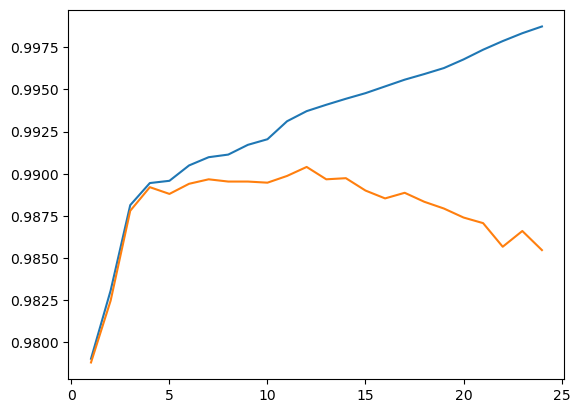

In [18]:
plt.plot(max_features,train_accuracy)
plt.plot(max_features,test_accuracy)

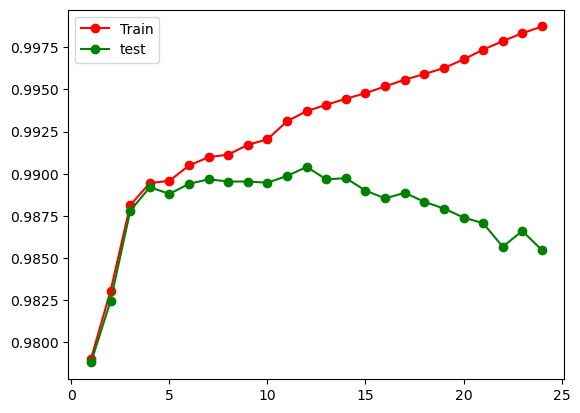

In [19]:
plt.plot(max_features,train_accuracy, '-o',color='red', label='Train')
plt.plot(max_features,test_accuracy, '-o',color='green', label='test')
plt.legend()

# Part 2